In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.

In [173]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [174]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [70]:
print(df.shape)

(2443651, 9)


In [163]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [181]:
# Crear la tabla cruzada
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Verifica las columnas de la tabla cruzada
print(crosstab.columns)  # Esto te ayudará a entender los nombres exactos (pueden ser True/False, 'Yes'/'No', etc.)

# Ajusta el cálculo en función de los nombres reales
best_seller_col = True  # Cambia esto si las columnas son diferentes
not_best_seller_col = False  # Cambia esto si las columnas son diferentes

# Calcular la proporción de best-sellers
crosstab['Proportion_BestSellers'] = crosstab[best_seller_col] / (
    crosstab[not_best_seller_col] + crosstab[best_seller_col]
)

# Ordenar las categorías por la proporción de best-sellers
crosstab_sorted = crosstab.sort_values(by='Proportion_BestSellers', ascending=False)

# Mostrar el resultado
crosstab_sorted.head(20).T

Index([False, True], dtype='bool', name='isBestSeller')


category,Grocery,Smart Home Security & Lighting,Health & Personal Care,Mobile Phone Accessories,Power & Hand Tools,"Billiard, Snooker & Pool",Pet Supplies,Home Brewing & Wine Making,Wind Instruments,Mirrors,Professional Medical Supplies,PC & Video Games,Bakeware,Material Handling Products,Bedding Accessories,Tableware,Arts & Crafts,Baby,Lighting,Window Treatments
isBestSeller,,,,,,,,,,,,,,,,,,,,
False,9008.000000,98.000000,9017.000000,248.000000,8353.000000,241.000000,9152.0000,239.000000,243.000,243.000,249.000000,6008.000000,233.000000,156.000,200.00000,243.000000,9319.000000,14709.000000,130.000000,234.000000
True,556.000000,6.000000,552.000000,11.000000,306.000000,8.000000,285.0000,7.000000,7.000,7.000,7.000000,157.000000,6.000000,4.000,5.00000,6.000000,230.000000,341.000000,3.000000,5.000000
Proportion_BestSellers,0.058135,0.057692,0.057686,0.042471,0.035339,0.032129,0.0302,0.028455,0.028,0.028,0.027344,0.025466,0.025105,0.025,0.02439,0.024096,0.024086,0.022658,0.022556,0.020921


- Are there categories where being a best-seller is more prevalent? 

*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


In [ ]:
# "Grocery", "Smart Home Security & Lighting" and "Health & Personal Care" got more than a 5% of Proportion_BestSellers



2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.


In [102]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])

# Realizar la prueba Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Mostrar resultados de la prueba Chi-cuadrado
print("Chi-cuadrado:", chi2)
print("Grados de libertad:", dof)
print("p-valor:", p)

# Interpretación del p-valor
if p < 0.05:
    print("Rechazamos H₀: Hay una relación entre la categoría y el estado de 'mejor vendido'.")
else:
    print("No podemos rechazar H₀: No hay evidencia suficiente para decir que hay relación.")

Chi-cuadrado: 36540.20270061387
Grados de libertad: 295
p-valor: 0.0
Rechazamos H₀: Hay una relación entre la categoría y el estado de 'mejor vendido'.


In [108]:
# Cálculo de Cramér's V
n = contingency_table.values.sum()  # Número total de observaciones
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Mostrar resultado de Cramér's V
print("Cramér's V:", cramers_v)

# Interpretación de Cramér's V
if cramers_v < 0.1:
    print("Asociación débil.")
elif cramers_v < 0.3:
    print("Asociación moderada.")
else:
    print("Asociación fuerte.")

Cramér's V: 0.1222829439760564
Asociación moderada.



3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [144]:
contingency_table.head()

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3


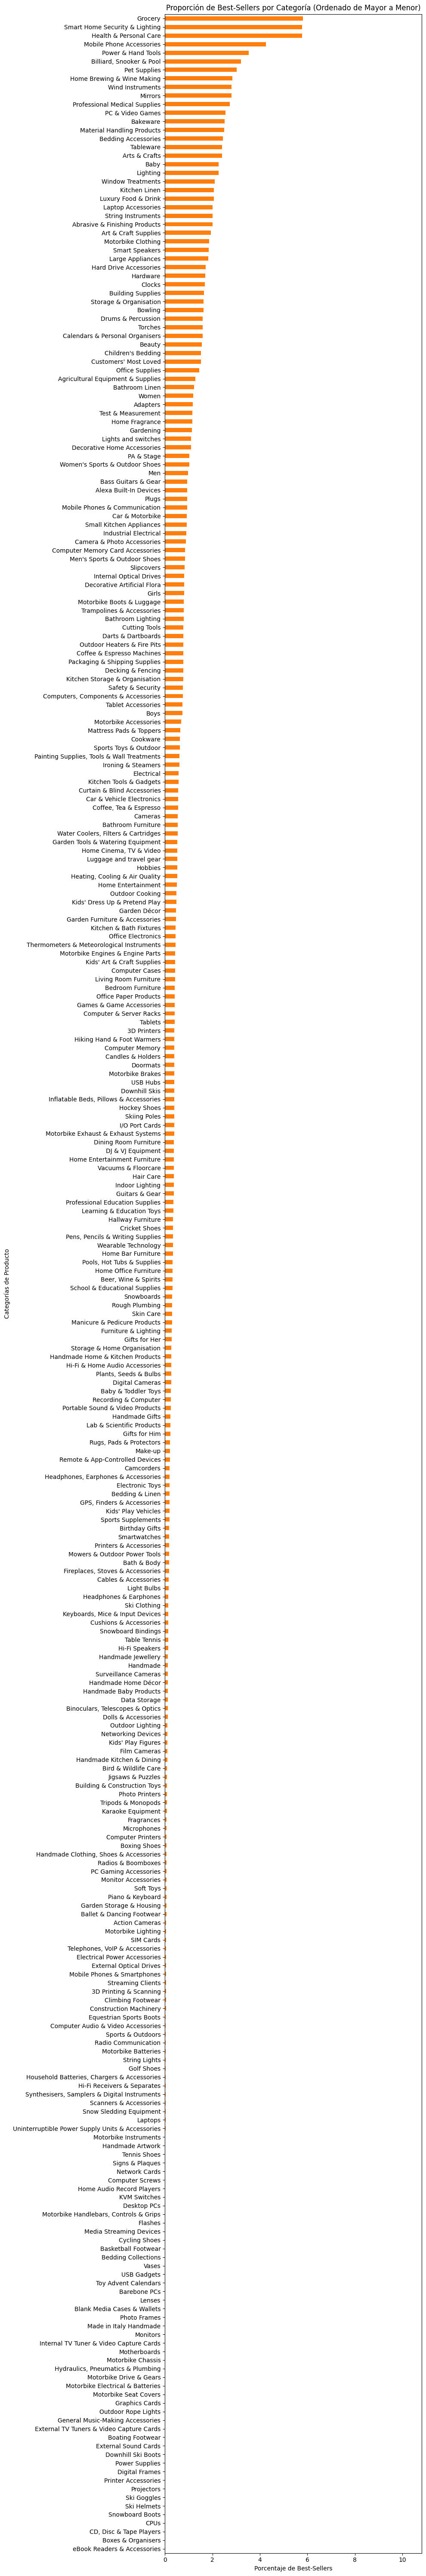

In [157]:
# Calcular el porcentaje de "best-sellers" (True)
percentage_bestsellers = (contingency_table[True] / contingency_table.sum(axis=1)) * 100

# Ordenar de mayor a menor
percentage_bestsellers_sorted = percentage_bestsellers.sort_values(ascending=True)

# Crear un gráfico de barras horizontal
percentage_bestsellers_sorted.plot(kind='barh', figsize=(10, 60), color='#ff7f0e')

# Añadir etiquetas y título
plt.title('Proporción de Best-Sellers por Categoría (Ordenado de Mayor a Menor)')
plt.xlabel('Porcentaje de Best-Sellers')
plt.ylabel('Categorías de Producto')

# Ajustar el límite del eje x al máximo valor automáticamente
plt.xlim(0, percentage_bestsellers_sorted.max() + 5)  # Agregar un pequeño margen al máximo

# Mostrar el gráfico
plt.tight_layout()
plt.show()


---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*


In [179]:
# Calcular Q1, Q3 y el IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar outliers
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Calcular el porcentaje de datos eliminados
total_data = len(df)
cleaned_data = len(df_cleaned)
removed_data = total_data - cleaned_data
percentage_removed = (removed_data / total_data) * 100

# Mostrar el número de datos antes y después de eliminar outliers
print(f"Datos originales: {len(df)}")
print(f"Datos después de eliminar outliers: {len(df_cleaned)}")
print(f"Datos eliminados: {removed_data} ({percentage_removed:.2f}%)")

Datos originales: 2443651
Datos después de eliminar outliers: 2115963
Datos eliminados: 327688 (13.41%)


In [197]:
df_cleaned.head().T

,0,1,2,3,4
uid,1,2,3,4,5
asin,B09B96TG33,B01HTH3C8S,B09B8YWXDF,B09B8T5VGV,B09WX6QD65
title,"Echo Dot (5th generation, 2022 release) | Big ...","Anker Soundcore mini, Super-Portable Bluetooth...","Echo Dot (5th generation, 2022 release) | Big ...","Echo Dot with clock (5th generation, 2022 rele...",Introducing Echo Pop | Full sound compact Wi-F...
stars,4.7,4.7,4.7,4.7,4.6
reviews,15308,98099,15308,7205,1881
price,21.99,23.99,21.99,31.99,17.99
isBestSeller,False,True,False,False,False
boughtInLastMonth,0,0,0,0,0
category,Hi-Fi Speakers,Hi-Fi Speakers,Hi-Fi Speakers,Hi-Fi Speakers,Hi-Fi Speakers



1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.


C:\Users\EliteBook\AppData\Local\Temp\ipykernel_656\870625532.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=df_filtered, palette='muted', scale='width')
C:\Users\EliteBook\AppData\Local\Temp\ipykernel_656\870625532.py:16: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='category', y='price', data=df_filtered, palette='muted', scale='width')


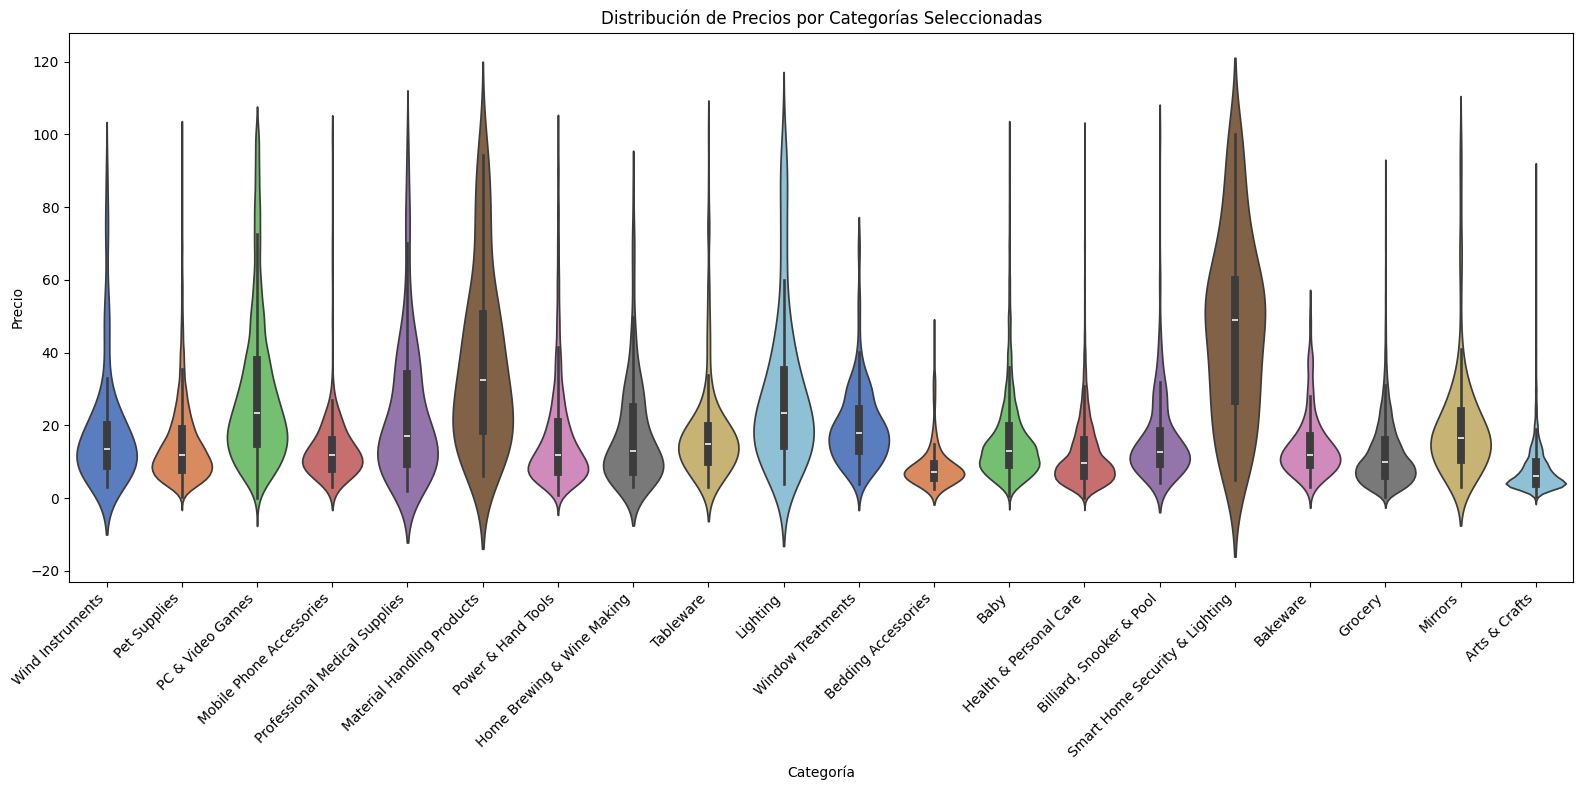

La categoría con la mediana de precio más alta es 'Laptops' con una mediana de precio de 1042.72.


In [195]:
# Lista de categorías específicas
categories_of_interest = [
    "Grocery", "Smart Home Security & Lighting", "Health & Personal Care",
    "Mobile Phone Accessories", "Power & Hand Tools", "Billiard, Snooker & Pool",
    "Pet Supplies", "Home Brewing & Wine Making", "Wind Instruments", "Mirrors",
    "Professional Medical Supplies", "PC & Video Games", "Bakeware",
    "Material Handling Products", "Bedding Accessories", "Tableware", 
    "Arts & Crafts", "Baby", "Lighting", "Window Treatments"
]

# Filtrar el DataFrame para incluir solo las categorías específicas
df_filtered = df_cleaned[df_cleaned['category'].isin(categories_of_interest)]

# Crear el Violin Plot
plt.figure(figsize=(16, 8))
sns.violinplot(x='category', y='price', data=df_filtered, palette='muted', scale='width')
plt.title('Distribución de Precios por Categorías Seleccionadas')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identificar la categoría con la mediana de precio más alta
median_prices = df.groupby('category')['price'].median()
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(f"La categoría con la mediana de precio más alta es '{highest_median_category}' con una mediana de precio de {highest_median_price:.2f}.")



2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.


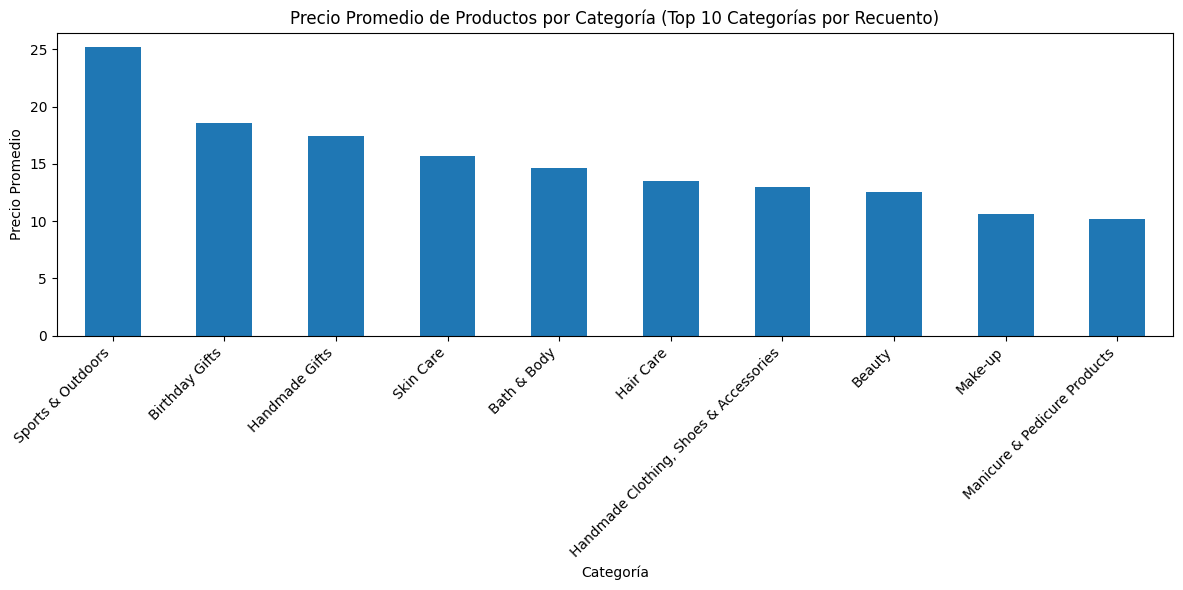

La categoría con el precio promedio más alto es 'Motherboards' con un precio promedio de 68.77.


In [187]:
# 1. Contar los productos por categoría y seleccionar las 10 categorías principales
top_10_categories = df_cleaned['category'].value_counts().head(10).index

# 2. Filtrar el DataFrame para incluir solo las 10 categorías principales
df_top_10 = df_cleaned[df_cleaned['category'].isin(top_10_categories)]

# 3. Calcular el precio promedio para las 10 categorías principales
average_prices_top_10 = df_top_10.groupby('category')['price'].mean()

# 4. Crear un gráfico de barras
plt.figure(figsize=(12, 6))
average_prices_top_10.sort_values(ascending=False).plot(kind='bar', color='#1f77b4')

# Añadir títulos y etiquetas
plt.title('Precio Promedio de Productos por Categoría (Top 10 Categorías por Recuento)')
plt.xlabel('Categoría')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Identificar la categoría con el precio promedio más alto (sin filtrar por top categorías)
average_prices_all = df_cleaned.groupby('category')['price'].mean()
highest_average_category = average_prices_all.idxmax()
highest_average_price = average_prices_all.max()

print(f"La categoría con el precio promedio más alto es '{highest_average_category}' con un precio promedio de {highest_average_price:.2f}.")



3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


C:\Users\EliteBook\AppData\Local\Temp\ipykernel_656\4233237389.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=df_top_10, palette='muted')


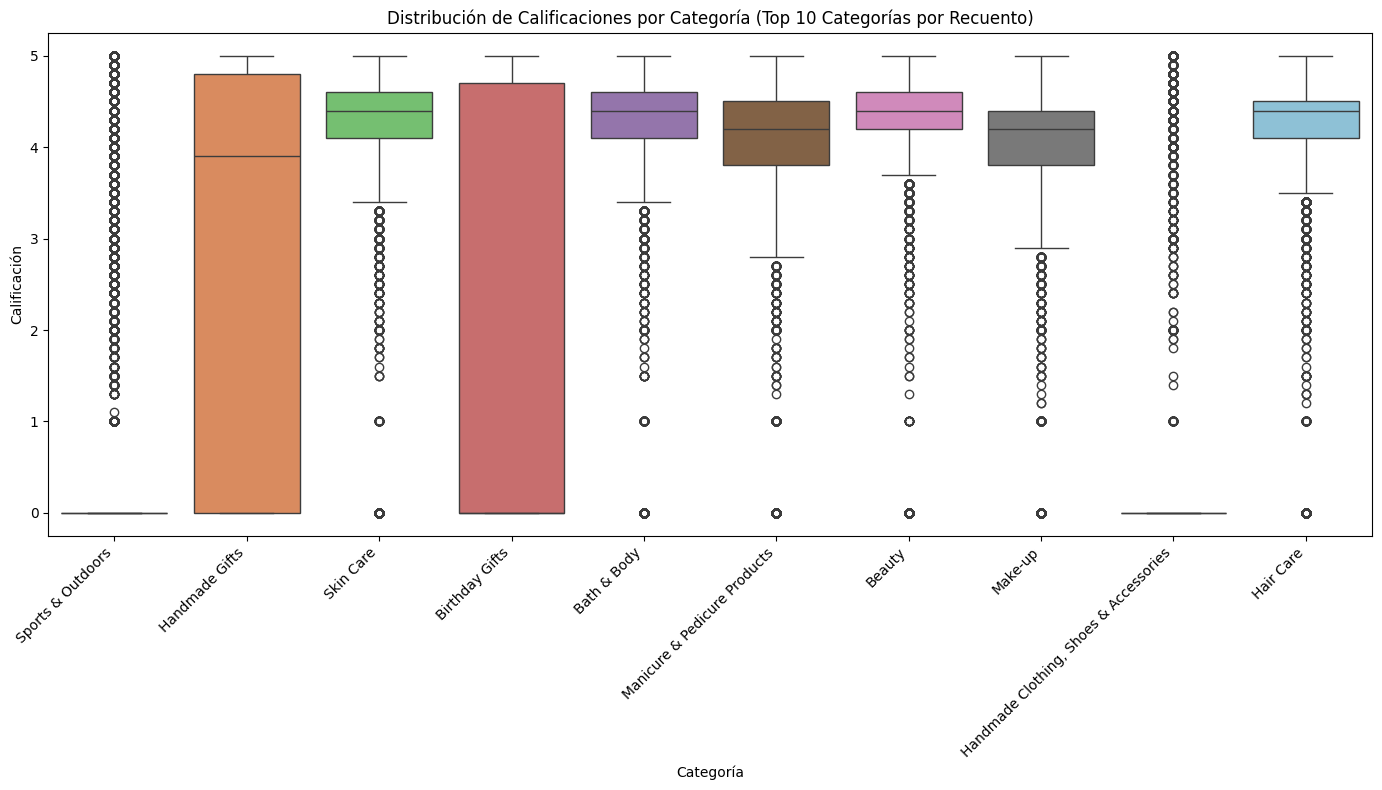

La categoría con la mediana de calificación más alta es 'Computer Memory' con una mediana de 4.70.


In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df_cleaned es el DataFrame sin outliers con las columnas 'category' y 'rating'

# 1. Contar los productos por categoría y seleccionar las 10 categorías principales
top_10_categories = df_cleaned['category'].value_counts().head(10).index

# 2. Filtrar el DataFrame para incluir solo las 10 categorías principales
df_top_10 = df_cleaned[df_cleaned['category'].isin(top_10_categories)]

# 3. Crear un boxplot para las 10 categorías principales
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='stars', data=df_top_10, palette='muted')
plt.title('Distribución de Calificaciones por Categoría (Top 10 Categorías por Recuento)')
plt.xlabel('Categoría')
plt.ylabel('Calificación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Identificar la categoría con la mediana de calificación más alta (sin filtrar por top categorías)
median_ratings = df_cleaned.groupby('category')['stars'].median()
highest_median_rating_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print(f"La categoría con la mediana de calificación más alta es '{highest_median_rating_category}' con una mediana de {highest_median_rating:.2f}.")



---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	


In [215]:
# 1. Verificar si hay valores nulos en las columnas relevantes y eliminarlos si es necesario
df_cleaned = df_cleaned.dropna(subset=['price', 'stars'])

# 2. Calcular el coeficiente de correlación entre precio y calificación (rating)
correlation_coefficient = df_cleaned['price'].corr(df_cleaned['stars'])

# 3. Mostrar el coeficiente de correlación
print(f"El coeficiente de correlación entre precio y calificación (rating) es: {correlation_coefficient:.2f}")

# Interpretación de la correlación
if abs(correlation_coefficient) > 0.7:
    print("Existe una correlación fuerte entre el precio y la calificación del producto.")
elif abs(correlation_coefficient) > 0.4:
    print("Existe una correlación moderada entre el precio y la calificación del producto.")
elif abs(correlation_coefficient) > 0.2:
    print("Existe una correlación débil entre el precio y la calificación del producto.")
else:
    print("No existe una correlación significativa entre el precio y la calificación del producto.")

El coeficiente de correlación entre precio y calificación (rating) es: -0.08
No existe una correlación significativa entre el precio y la calificación del producto.


2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 



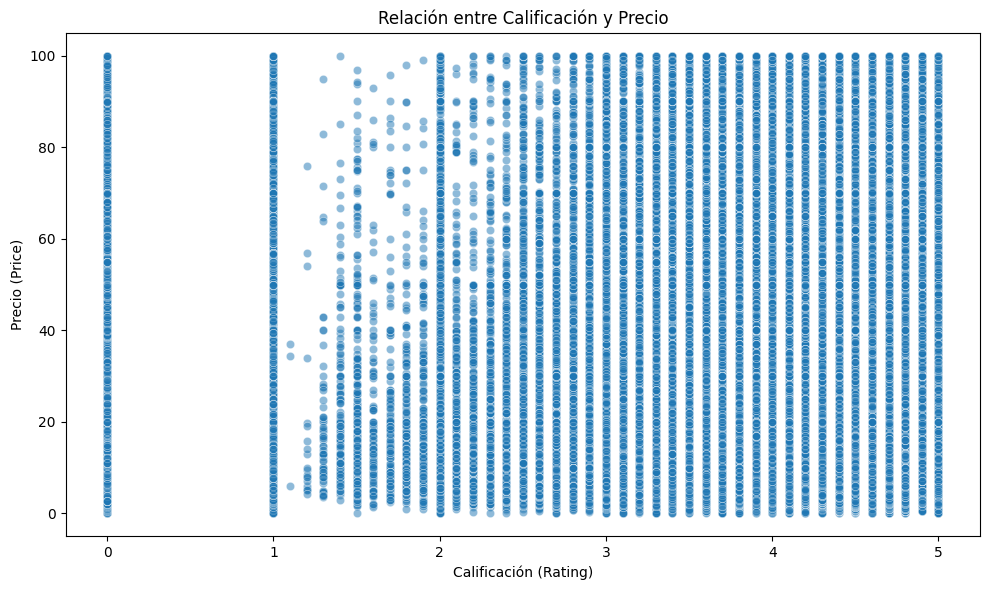

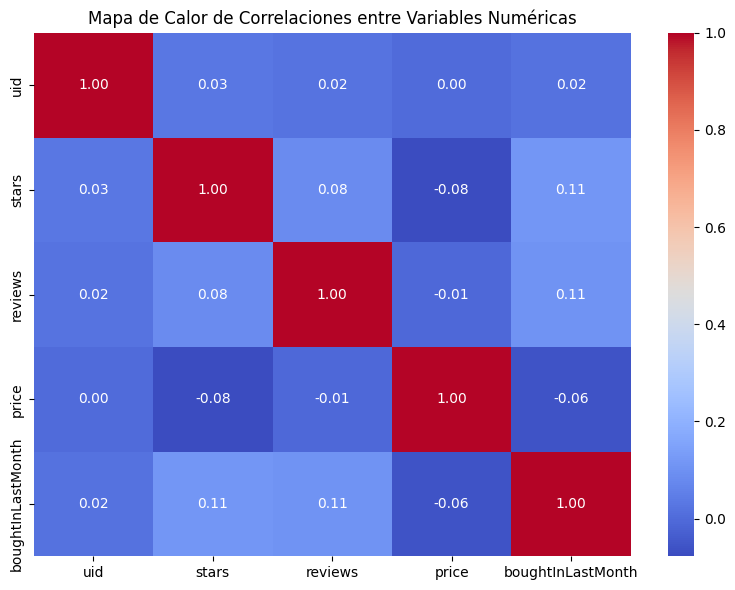

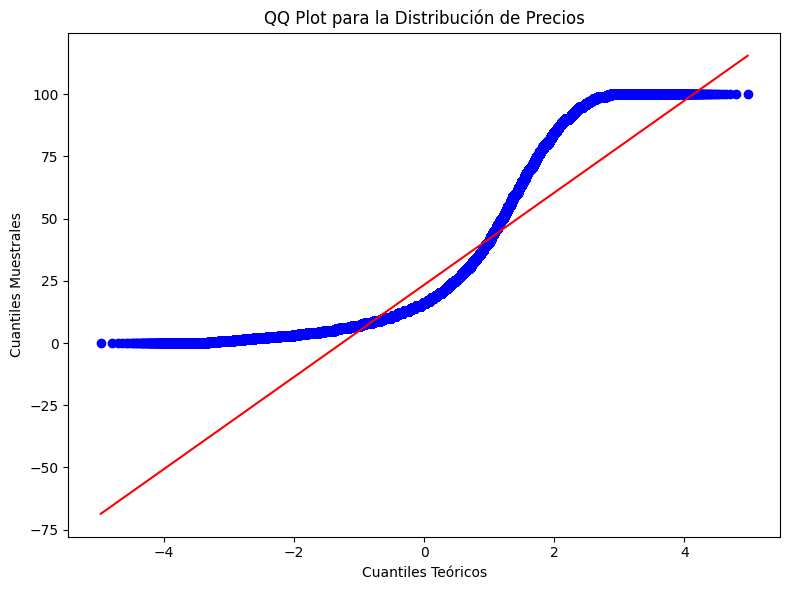

In [217]:
# Asegurarse de que no haya valores nulos en el DataFrame
df_cleaned = df_cleaned.dropna()

# Seleccionar únicamente columnas numéricas
numeric_df = df_cleaned.select_dtypes(include='number')

# 1. Scatter plot: Relación entre calificación y precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=numeric_df, alpha=0.5)
plt.title('Relación entre Calificación y Precio')
plt.xlabel('Calificación (Rating)')
plt.ylabel('Precio (Price)')
plt.tight_layout()
plt.show()

# 2. Heatmap de correlaciones entre todas las variables numéricas
plt.figure(figsize=(8, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()

# 3. QQ plot para verificar si los precios siguen una distribución normal
plt.figure(figsize=(8, 6))
stats.probplot(numeric_df['price'], dist="norm", plot=plt)
plt.title('QQ Plot para la Distribución de Precios')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles Muestrales')
plt.tight_layout()
plt.show()